In [1]:
import os
import sys
import json
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sys.path.append("/home/spatial/")
import pyCellScopes as pcs

sc.settings.verbosity = 3  
import warnings
warnings.filterwarnings('ignore')
cmap = mcolors.LinearSegmentedColormap.from_list('WhRd',['#e5e5e5', "#fffacd", "red", "darkred"], N=256)  

/home/spatial/anaconda3/envs/scvi-env/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata_imputed = pst.load_Xenium_iri_data()

In [10]:
celltype_color_dict = {'Pod': '#961E1E',
 'Glom-EC': '#df5a78',
 'PTS1': '#d3d3d3',
 'PTS2': '#B0CF98',
 'PTS3': '#426D54',
 'Inj_PT':'#f3765d',
 'FR_PT': '#6b146d',                
 'DTL': '#2a9df4',
 'TAL': '#c7e6f9',
 'DCT': '#ed76bc',
 'CNT': '#E6A7D6',
 'PC': '#F4D2E1',
 'ICA': '#F4C4C4',
 'ICB': '#F39EAF',
 'Uro': "#292a4d",
 'PEC': '#9c8490',
 'EC': '#d0a799',              
 'Fib': '#eeb248',                     
 'Per-SMC': '#bca861',
 "Immune": '#cb5b3a'}

adata_imputed.uns["celltype_colors"] = list(celltype_color_dict.values())

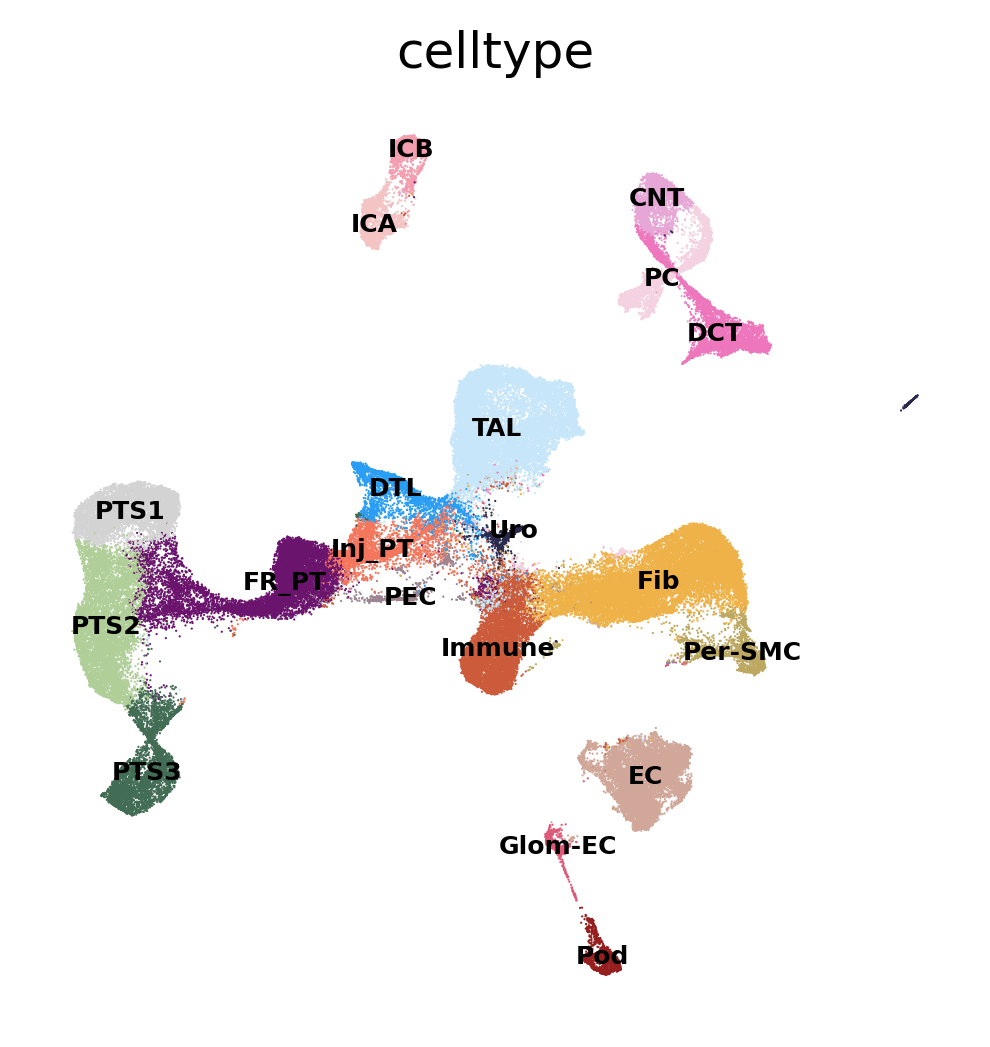

In [11]:
with plt.rc_context({"figure.dpi": (300), "figure.figsize":(4,4), "savefig.dpi":(300)}):
    sc.pl.embedding(adata_imputed, basis='reduced_pc_50_umap', color='celltype',legend_fontsize=6,
                    legend_loc = "on data", frameon=False, show=False)
    plt.show()

In [31]:
marker_genes = ["Vcam1","Havcr1", "Il34","Pdgfd","Sema3c", 
                "Ptprc","Ctss","Spp1",'Csf1r','Ccr2','Ccr5',
                "Pdgfrb","Pdgfra","Fn1","Col8a1","Col1a1"]

In [21]:
plot = adata_imputed[adata_imputed.obs.celltype.isin(["Fib","Immune","FR_PT"])]

In [23]:
plot.obs["celltype"] = plot.obs["celltype"].cat.reorder_categories(['FR_PT','Immune','Fib'])

In [24]:
plot.layers["scaled"] = sc.pp.scale(plot, copy=True).X

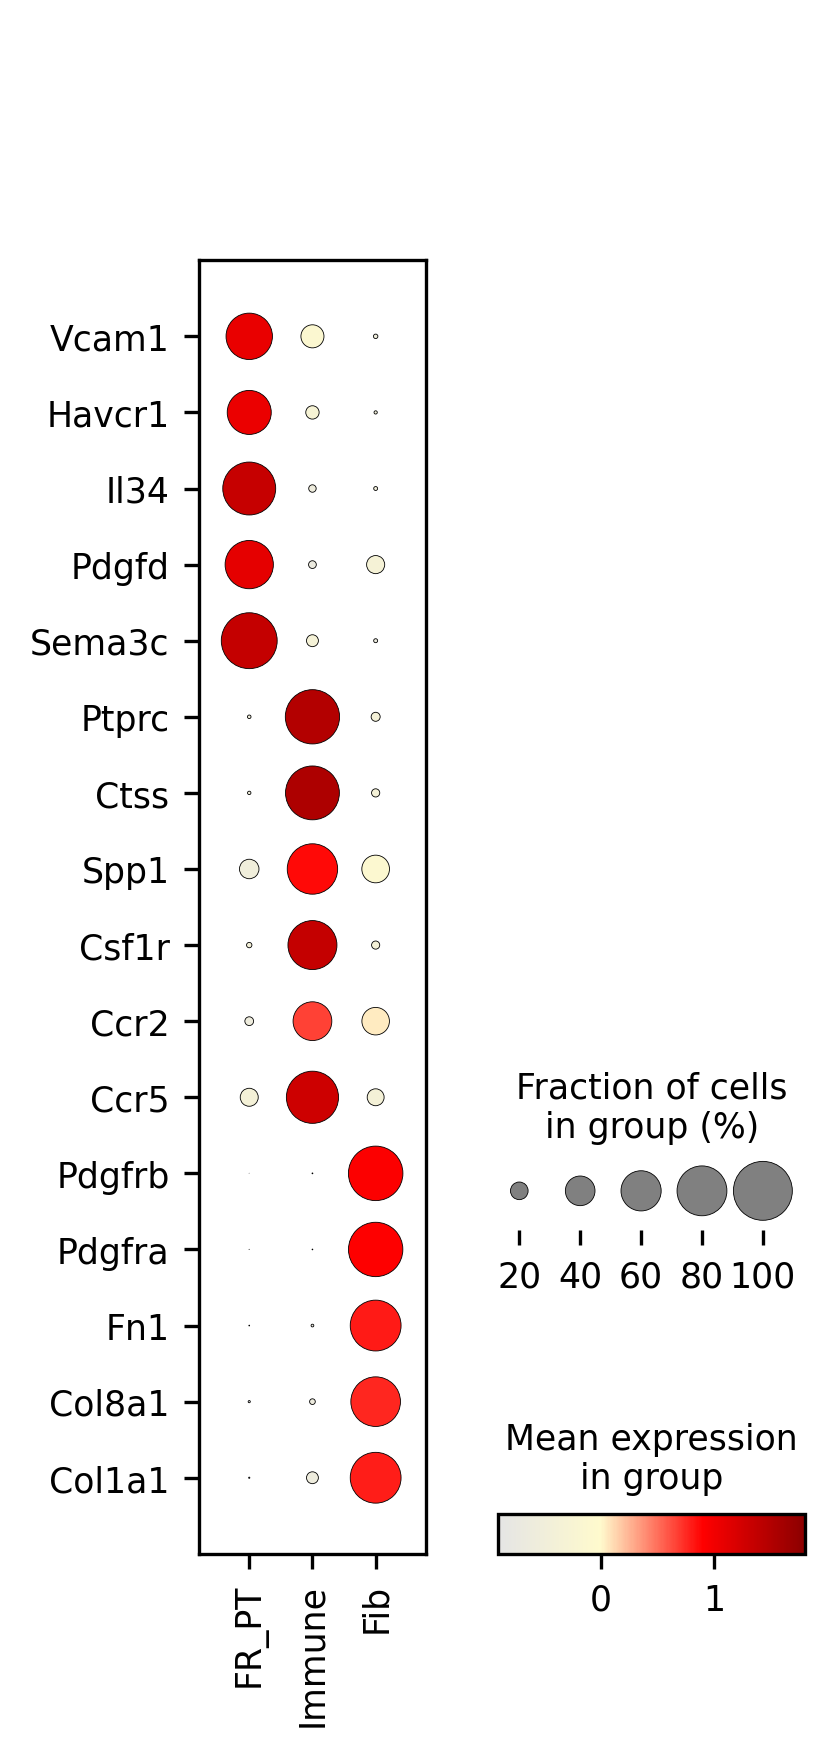

In [59]:
with plt.rc_context({"figure.dpi": (300), "figure.figsize":(4,5), "savefig.dpi":(300)}):
    sc.pl.dotplot(
        plot,  
        marker_genes, groupby="celltype", cmap = cmap, use_raw=False, layer="scaled", vmax=1.8, show=False, swap_axes=True)
    plt.show()